In [2]:
%matplotlib inline

In [4]:
import sys
sys.path.insert(0, r"C:\Projects\CCS_SimpleSMU\PyVerify")

In [5]:
from pverify.drivers.SMU.ke2450.ke2450 import *

C:\Inicio\tools\64\Anaconda3-4.0.0.4\lib\site-packages\matplotlib\__init__.py:1350: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [6]:
s = ke2450()
s.Initialize("USB0::0x05E6::0x2450::04314436::INSTR", True, True, OptionString="simulate=false")
c = s.GetChannel(1)

# Quick Setup

In [40]:
c.SourceMeterSetup(Source="voltage", Measure="voltage",    Performance=0)

In [41]:
c.SourceMeterSetup(Source="voltage", Measure="current",    Performance=1)

In [42]:
c.SourceMeterSetup(Source="voltage", Measure="resistance", Performance=2)

In [43]:
c.SourceMeterSetup(Source="voltage", Measure="power",      Performance=3)

In [44]:
c.SourceMeterSetup(Source="current", Measure="voltage",    Performance=4)

In [45]:
c.SourceMeterSetup(Source="current", Measure="current",    Performance=5)

In [46]:
c.SourceMeterSetup(Source="current", Measure="resistance", Performance=6)

In [47]:
c.SourceMeterSetup(Source="current", Measure="power",      Performance=3)

# Source Voltage, Measure Voltage

In [48]:
c.SourceMeterSetup(Source="voltage", Measure="voltage", Performance=3)

In [49]:
c.Source.Voltage.ConfigureSource(Amplitude=5, Range=10, ReadBackState=True)

In [50]:
c.Source.SetOutputEnabled(True)

In [51]:
print(c.Measure.Read())  # Returns the sourced and measured value

[4.999976, 4.999976]


In [52]:
print(c.Measure.Fetch(BufferElements="SOUR, SOURUNIT"))

[4.999976, 'Volt DC']


In [53]:
print(c.Measure.Fetch(BufferElements="READ, UNIT"))

[4.999976, 'Volt DC']


In [54]:
c.Source.Voltage.ConfigureSource(Amplitude=0)
c.Source.SetOutputEnabled(False)

# Source Voltage, Measure Current

The performance parameter pre-configures NPLC, Resolution, AutoZeroState and Averaging

In [107]:
c.SourceMeterSetup(Source="voltage", Measure="current", Performance=3)

In [110]:
c.Source.Voltage.ConfigureSource(Amplitude=5, Range=10, ReadBackState=True)

In [111]:
c.Source.Voltage.SetCurrentLimit(0.01)

In [112]:
c.Measure.Current.ConfigureMeasurement(Range=0.05)

In [113]:
c.Source.SetOutputEnabled(True)

In [114]:
print(c.Measure.Read())  # Returns the sourced and measured value

[5.000171, 0.005008554]


In [61]:
print(c.Measure.Fetch(BufferElements="SOUR, SOURUNIT"))  # Fetch data from the previous measurement done by Read()
print(c.Measure.Fetch(BufferElements="READ, UNIT"))

[5.00019, 'Volt DC']
[0.005008271, 'Amp DC']


In [62]:
c.Source.Voltage.ConfigureSource(Amplitude=0)
c.Source.SetOutputEnabled(False)

# Source Voltage, Measure Resistance

In [63]:
c.SourceMeterSetup(Source="voltage", Measure="resistance", Performance=3)

In [64]:
c.Source.Voltage.ConfigureSource(Amplitude=5, Range=10, ReadBackState=True)

In [65]:
c.Measure.Current.ConfigureMeasurement(Range=0.05)

In [66]:
c.Source.SetOutputEnabled(True)

In [67]:
print(c.Measure.Read())  # Returns the sourced and measured value

[5.000185, 998.3309]


In [68]:
print(c.Measure.Fetch(BufferElements="SOUR, SOURUNIT"))
print(c.Measure.Fetch(BufferElements="READ, UNIT"))

[5.000185, 'Volt DC']
[998.3309, 'Ohm']


In [69]:
c.Source.Voltage.ConfigureSource(Amplitude=0)
c.Source.SetOutputEnabled(False)

# Source Voltage, Measure Power

In [70]:
c.SourceMeterSetup(Source="voltage", Measure="power", Performance=3)

In [71]:
c.Source.Voltage.ConfigureSource(Amplitude=5, Range=10, ReadBackState=True)

In [72]:
c.Measure.Current.ConfigureMeasurement(Range=0.05)

In [73]:
c.Source.SetOutputEnabled(True)

In [74]:
print(c.Measure.Read())  # Returns the sourced and measured value

[5.000193, 0.02504251]


In [75]:
print(c.Measure.Fetch(BufferElements="SOUR, SOURUNIT"))
print(c.Measure.Fetch(BufferElements="READ, UNIT"))

[5.000193, 'Volt DC']
[0.02504251, 'Watt DC']


In [76]:
c.Source.Voltage.ConfigureSource(Amplitude=0)
c.Source.SetOutputEnabled(False)

# Source Current, Measure Voltage

In [77]:
c.SourceMeterSetup(Source="current", Measure="voltage", Performance=3)

In [78]:
c.Source.Current.ConfigureSource(Amplitude=0.05, Range=1, ReadBackState=True)

In [79]:
c.Source.Current.SetVoltageLimit(2)

In [80]:
c.Measure.Voltage.ConfigureMeasurement(Range=20)

In [81]:
c.Source.SetOutputEnabled(True)

In [82]:
print(c.Measure.Read())  # Returns the sourced and measured value

[0.002113114, 2.120204]


In [83]:
print(c.Measure.Fetch(BufferElements="SOUR, SOURUNIT"))
print(c.Measure.Fetch(BufferElements="READ, UNIT"))

[0.002113114, 'Amp DC']
[2.120204, 'Volt DC']


In [84]:
c.Source.Current.ConfigureSource(Amplitude=0)
c.Source.SetOutputEnabled(False)

# Source Current, Measure Current

In [85]:
c.SourceMeterSetup(Source="current", Measure="current", Performance=3)

In [86]:
c.Source.Current.ConfigureSource(Amplitude=0.05, Range=1, ReadBackState=True)

In [87]:
c.Source.SetOutputEnabled(True)

In [88]:
print(c.Measure.Read())  # Returns the sourced and measured value

[0.002136402, 0.002136402]


In [89]:
print(c.Measure.Fetch(BufferElements="SOUR, SOURUNIT"))
print(c.Measure.Fetch(BufferElements="READ, UNIT"))

[0.002136402, 'Amp DC']
[0.002136402, 'Amp DC']


In [90]:
c.Source.Current.ConfigureSource(Amplitude=0)
c.Source.SetOutputEnabled(False)

# Source Current, Measure Resistance

In [91]:
c.SourceMeterSetup(Source="current", Measure="resistance", Performance=3)

In [92]:
c.Source.Current.ConfigureSource(Amplitude=0.05, Range=1, ReadBackState=True)

In [93]:
c.Source.Current.SetVoltageLimit(2)

In [94]:
c.Measure.Voltage.ConfigureMeasurement(Range=20)

In [95]:
c.Source.SetOutputEnabled(True)

In [96]:
print(c.Measure.Read())  # Returns the sourced and measured value

[0.002014129, 993.0806]


In [97]:
print(c.Measure.Fetch(BufferElements="SOUR, SOURUNIT"))
print(c.Measure.Fetch(BufferElements="READ, UNIT"))

[0.002014129, 'Amp DC']
[993.0806, 'Ohm']


In [98]:
c.Source.Current.ConfigureSource(Amplitude=0)
c.Source.SetOutputEnabled(False)

# Source Current, Measure Power

In [99]:
c.SourceMeterSetup(Source="current", Measure="power", Performance=3)

In [100]:
c.Source.Current.ConfigureSource(Amplitude=0.05, Range=1, ReadBackState=True)

In [101]:
c.Source.Current.SetVoltageLimit(2)

In [102]:
c.Measure.Voltage.ConfigureMeasurement(Range=20)

In [103]:
c.Source.SetOutputEnabled(True)

In [104]:
print(c.Measure.Read())  # Returns the sourced and measured value

[0.00201995, 0.004040284]


In [105]:
print(c.Measure.Fetch(BufferElements="SOUR, SOURUNIT"))
print(c.Measure.Fetch(BufferElements="READ, UNIT"))

[0.00201995, 'Amp DC']
[0.004040284, 'Watt DC']


In [106]:
c.Source.Current.ConfigureSource(Amplitude=0)
c.Source.SetOutputEnabled(False)

# DirectIO

In [38]:
s.DirectIO.Write("*IDN?")
print(s.DirectIO.Read())

KEITHLEY INSTRUMENTS,MODEL 2450,04314436,1.6.3d


In [39]:
print(s.DirectIO.Query("*IDN?"))

KEITHLEY INSTRUMENTS,MODEL 2450,04314436,1.6.3d


# Trigger Models

In [21]:
c.SourceMeterSetup(Source="voltage", Measure="voltage", Performance=3)
c.Source.Voltage.SetCurrentLimit(0.1)

## Trigger Models - Simple Loop

In [9]:
s.Trigger.ConfigureSimpleLoopTrigger(Count=10, Delay=0.05)

## Trigger Models - Duration Loop

In [13]:
s.Trigger.ConfigureDurationLoopTrigger(Duration=2, Delay=0.05)

## Trigger Models - Sweeps

In [22]:
c.Source.Voltage.ConfigureLinearSweep(Start=0, Stop=5, Points=20, Delay=0.05)

In [26]:
c.Source.Voltage.ConfigureLinearSweepStep(Start=0, Stop=5, Step=0.1, Delay=0.05)

In [30]:
c.Source.Voltage.ConfigureLogarithmicSweep(Start=0.01, Stop=5, Points=20, Delay=0.05)

In [34]:
c.Source.Voltage.ConfigureListSweep(Values=[0, 1, 2, 3, 4, 5], Ranges=None, Delay=0.2)

## Trigger Models - Initiate and get waveforms

In [35]:
s.Trigger.Initiate()
s.Trigger.Wait4Idle(10)

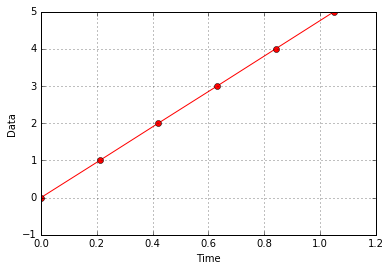

In [36]:
c.Measure.Trace.GetSourceWaveform().plot("ro-")

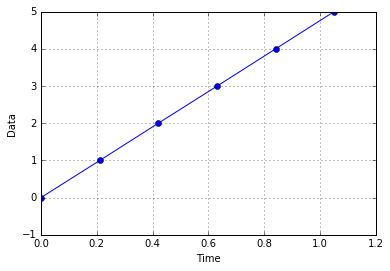

In [37]:
c.Measure.Trace.GetReadingWaveform().plot("bo-")

In [ ]:
print("Average:   %s" % c.Measure.Trace.GetAverageReading())
print("Maximum:   %s" % c.Measure.Trace.GetMaximumReading())
print("Minimum:   %s" % c.Measure.Trace.GetMinimumReading())
print("Peak2Peak: %s" % c.Measure.Trace.GetPeak2PeakReading())
print("SDev:      %s" % c.Measure.Trace.GetSDevReading())

In [ ]:
c.Measure.Trace.GetData(BufferElements="SOUR, UNIT", Transposed=False)